In [1]:
# imports for this notebook 

import numpy as np
from scipy.special import expit
import pandas as pd

from ananke.graphs import ADMG
from ananke.estimation import AverageCausalEffect

# Semiparametric Inference For Causal Effects

In this section, we discuss how to estimate the effect of treatment $T$ on outcome $Y$ which is encoded by the counterfactual of the form $Y(t)$ -- this reads as the potential outcome $Y$ had treatment been assigned to $t$. If the outcome is continuous, the effect is typically captured by average causal effect (ACE) defined as 

$\psi = E[Y(1)] - E[Y(0)], \quad \text{(when Y is continuous.)}$  

When $Y$ is binary, the effect is typically reported as the log of odds ratios as follows.

$\psi = \log(\frac{p(Y(1) = 1)/p(Y(1) = 0)}{p(Y(0) = 1)/p(Y(0) = 0)}), \quad \text{(when Y is binary.)}$


In Ananke, we consider identification and estimation of these quantities using causal graphical models. We illustrate these through a series of examples with increasing levels of complications. We start off by the simplest and most commonly used model known as conditional ignorable model.  

### Example 1: Conditional Ignorability 

In a conditional ignorable model, the assumption is that all the common confounders between the treatment and outcome are measured. In mathematical form, we assume there exist a set $C$ such that $Y(t) \perp T \mid C, T = 0, 1.$ Graphically, it is represented as follows: 


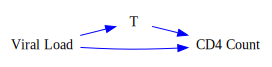

In [3]:
vertices = ['Viral Load', 'T', 'CD4 Count']
di_edges = [('Viral Load', 'T'), ('Viral Load', 'CD4 Count'), ('T', 'CD4 Count')]
G = ADMG(vertices, di_edges)
G.draw(direction="LR")